In [1]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

In [2]:
df1 = pd.read_csv("dataset/04_store_member.csv")

In [3]:
df1

,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00
...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.00
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.00
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.00
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.00


In [4]:
df2 = pd.read_csv("dataset/04_store_product_1.csv")

In [5]:
df2

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001,채소,과일채소,딸기,딸기(1kg),1.00,13600,매장1,NaN,2102
1,20170201,80201053,간식,떡,가래떡,현미가래떡(400g),1.00,99999999,매장1,NaN,2102
2,20170201,110104033,음료,음료,음료기타,개복숭아감식초(700ml),1.00,13000,매장1,NaN,2103
3,20170201,40203001,과실,견과,잣,잣(220g:1병),1.00,14800,매장1,NaN,2105
4,20170201,50417002,채소,뿌리채소,우엉,우엉(300g),1.00,3400,매장1,NaN,2105
...,...,...,...,...,...,...,...,...,...,...,...
130888,20170630,50703002,채소,버섯,새송이버섯,새송이버섯(300g),1.00,3850,매장1,NaN,2252
130889,20170630,60304014,축산물,육가공,양념육,오리양념불고기(500g),2.00,22800,매장1,NaN,2252
130890,20170630,60401341,축산물,유제품,우유/산양유,우유(범산/200ml),3.00,3465,매장1,NaN,2637
130891,20170630,80401095,간식,빵,단과자빵,소보루빵(75g)/매장,1.00,1320,매장1,NaN,2637


In [6]:
df1.columns.intersection(df2.columns)

Index(['회원번호'], dtype='object')

In [7]:
# 고객 1명 당 총 구매금액, 총 구매수량
df2.pivot_table(index="회원번호", values=["구매금액", "구매수량"], aggfunc="sum")

,구매금액,구매수량
회원번호,,
2102,102093159,472.50
2103,7904400,1586.40
2104,389040,112.00
2105,3067930,602.00
2106,54550,25.00
...,...,...
6471,1600,1.00
6474,709400,175.00
6478,2600,1.00


`reset_idex`로 `회원번호`를 뺀 이유:
> df1에도 `회원번호`가 있어서 `on="회원번호"`로 df2와 `pd.merge`하기 위함

In [8]:
# df.reset_index(): df의 index를 df의 col로 빼주고, df의 index를 RangeIndex로 바꾼다.
df3 = df2.pivot_table(index="회원번호", values=["구매금액", "구매수량"]).reset_index()

In [9]:
df3

,회원번호,구매금액,구매수량
0,2102,249616.53,1.16
1,2103,5203.69,1.04
2,2104,5721.18,1.65
3,2105,5992.05,1.18
4,2106,3409.38,1.56
...,...,...,...
1378,6471,1600.00,1.00
1379,6474,4030.68,0.99
1380,6478,2600.00,1.00
1381,6489,3157.14,2.00


pd.merge(df1, df2, on, how)
> - on: key col
> - how:

- df1에는 고객 4396명 정보가 있다.
- df3에는 고객 1383명 정보가 있다. 
- df3 `회원번호`는 df1 `회원번호`의 subset 인가? 
- `구매금액`과 `구매수량` col은 고객 1383명만 있다.
- df3을 구매특성 df라고 하자.
- index는 key col로 사용할 수 없다.
> index를 key col로 사용하기 위해 `reset_index` 사용한다.
- 어차피 분석하려면 missing val 지워야 한다. 
> 따라서 inner join으로 병합한 df 사용하자.
- 그냥 붙이면 중복되거나, 누락되는 일이 발생할 수 있다.
> 데이터 구조, 타입에 맞는 적절한 병합 방법을 우리가 찾아서 사용해야 한다.

## inner join

In [10]:
df4 = pd.merge(df1, df3, on="회원번호", how="inner")

## right join


In [11]:
pd.merge(df3, df1, on="회원번호", how="right")

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년
0,2101,NaN,NaN,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00
1,2102,249616.53,1.16,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00
2,2103,5203.69,1.04,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00
3,2104,5721.18,1.65,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00
4,2105,5992.05,1.18,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00
...,...,...,...,...,...,...,...,...
4391,6492,NaN,NaN,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.00
4392,6493,NaN,NaN,정상회원,여,기혼,서울 관악구 행운동 1681,1982.00
4393,6494,NaN,NaN,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.00
4394,6495,NaN,NaN,정상회원,여,기혼,서울 용산구 한남동 737-,1961.00


In [12]:
pd.merge(df3, df1, on="회원번호", how="left")

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년
0,2102,249616.53,1.16,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00
1,2103,5203.69,1.04,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00
2,2104,5721.18,1.65,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00
3,2105,5992.05,1.18,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00
4,2106,3409.38,1.56,정상회원,여,NaN,경기 용인시 수지구 상현동,1953.00
...,...,...,...,...,...,...,...,...
1378,6471,1600.00,1.00,정상회원,여,미혼,경기 성남시 분당구 수내2동,1972.00
1379,6474,4030.68,0.99,탈퇴,여,NaN,경기 용인시 수지구 성복동,1950.00
1380,6478,2600.00,1.00,정상회원,여,기혼,서울 강남구 압구정동 구현대,1945.00
1381,6489,3157.14,2.00,정상회원,여,미혼,경기 고양시 덕양구 화정1동,1959.00


## df4 분석
고객의  인적특성을 바탕으로 구매특성 분석하기

In [13]:
df4

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액,구매수량
0,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00,249616.53,1.16
1,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00,5203.69,1.04
2,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00,5721.18,1.65
3,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00,5992.05,1.18
4,2106,정상회원,여,NaN,경기 용인시 수지구 상현동,1953.00,3409.38,1.56
...,...,...,...,...,...,...,...,...
1378,6471,정상회원,여,미혼,경기 성남시 분당구 수내2동,1972.00,1600.00,1.00
1379,6474,탈퇴,여,NaN,경기 용인시 수지구 성복동,1950.00,4030.68,0.99
1380,6478,정상회원,여,기혼,서울 강남구 압구정동 구현대,1945.00,2600.00,1.00
1381,6489,정상회원,여,미혼,경기 고양시 덕양구 화정1동,1959.00,3157.14,2.00


In [14]:
# 고객 연령 계산
df4["연령"] = 2023 - df4['생년']

In [15]:
import seaborn as sns
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False 
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# 성별비교: 인원수가 10배 차이난다.
df4["성별"].value_counts()

여    1270
남     112
Name: 성별, dtype: int64

In [17]:
# 성별비교: 인원수가 10배 차이난다.
# 인원차이로 인해 구매금액, 구매수량의 차이도 크다.
df4.pivot_table(index="성별", values=["구매금액", "구매수량"], aggfunc="sum")

,구매금액,구매수량
성별,,
남,894103.85,152.41
여,8270886.15,1517.27


<Axes: xlabel='성별', ylabel='구매금액'>

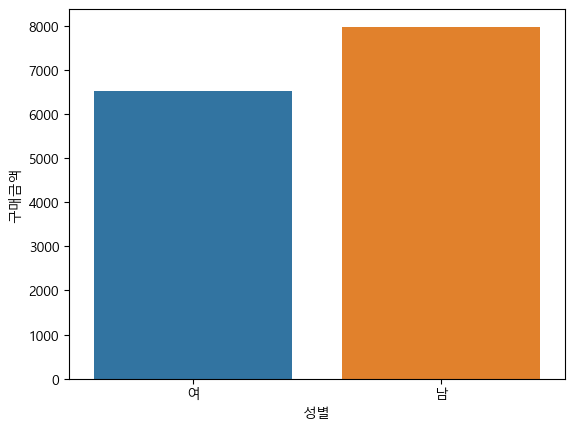

In [18]:
# estimator의 default는 "mean"이다.
sns.barplot(data=df4, x="성별", y="구매금액", errorbar=None)

<Axes: xlabel='성별', ylabel='구매금액'>

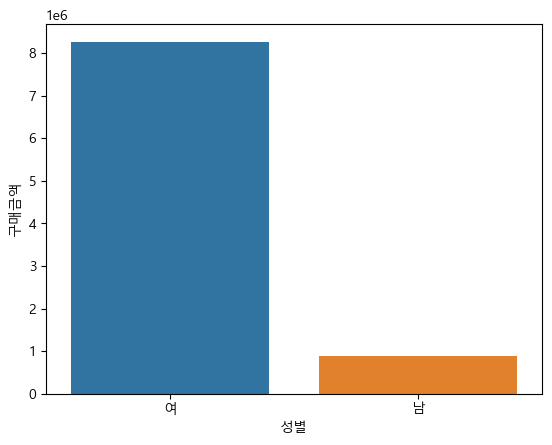

In [19]:
sns.barplot(data=df4, x="성별", y="구매금액", errorbar=None, estimator="sum")

여성이 장을 보는 경우가 더 흔하기 때문에 당연한 결과(구매 금액 평균, 합 모두 여성이 더 높다.).

In [20]:
df4["연령"]

0      76.00
1      51.00
2      54.00
3      75.00
4      70.00
        ... 
1378   51.00
1379   73.00
1380   78.00
1381   64.00
1382   65.00
Name: 연령, Length: 1383, dtype: float64

In [21]:
# 이상치: 연령에 음의 값이 있다
df4["연령"].describe()

count      1381.00
mean        -85.85
std        5327.94
min     -197914.00
25%          45.00
50%          52.00
75%          61.00
max        1830.00
Name: 연령, dtype: float64

In [22]:
cond1 = (df4["연령"] > 1) & (df4["연령"] < 100)
df4.loc[cond1]["연령"].describe()

count   1375.00
mean      53.57
std       11.19
min       30.00
25%       45.00
50%       52.00
75%       61.00
max       96.00
Name: 연령, dtype: float64

<Axes: xlabel='연령', ylabel='구매수량'>

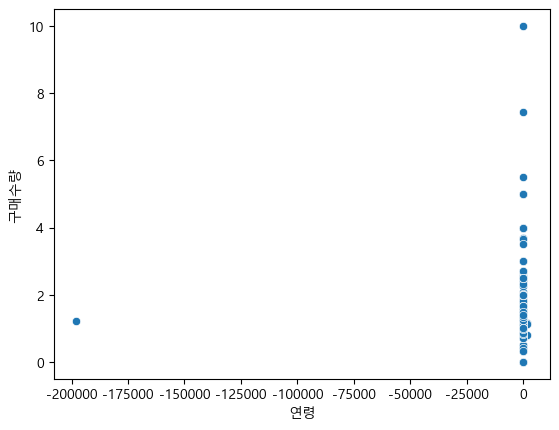

In [23]:
# sns.scatterplot: 숫자 데이터끼리 비교하는 시각화 기법
# 연령-구매수량 간의 관계 살펴보기
# : 연령에 따라 구매수량이 증가하는가?를 볼 수 있음.
# 연령 이상치 때문에 데이턱  한쪽으로 쏠려있는 것처럼 보인다.
# Insight: 4-50대 고객들 구매력이 강하다. 
sns.scatterplot(data=df4, x="연령", y="구매수량")

<Axes: xlabel='연령', ylabel='구매수량'>

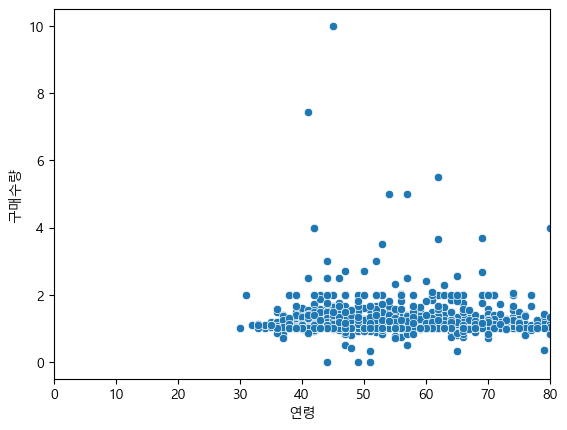

In [24]:
# 쏠려보이는 현상을 제거하기 위해 plt.xlim을 사용한다.
plt.xlim([0, 80])
sns.scatterplot(data=df4, x="연령", y="구매수량")

<Axes: xlabel='연령', ylabel='구매수량'>

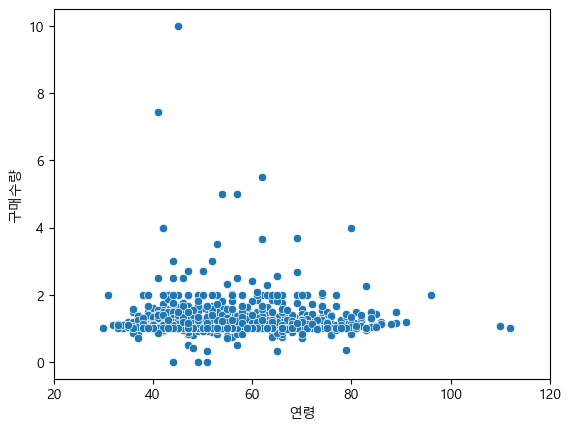

In [25]:
# 위 그림을 보니 xlim을 조정해야 할 것 같다. 
plt.xlim([20, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량")

<Axes: xlabel='연령', ylabel='구매수량'>

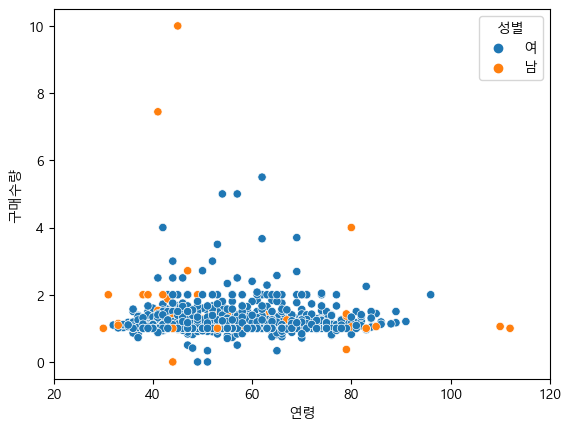

In [26]:
# xlim 조정한 figure에 성별 구분해보자: 
plt.xlim([20, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량", hue="성별")